In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from dotenv import load_dotenv

from sqlalchemy import create_engine
# Set up the database connection
load_dotenv()
engine = create_engine(f"mysql+pymysql://{os.getenv('DB_USER')}:{os.getenv('DB_PASSWORD')}@{os.getenv('DB_HOST')}/{os.getenv('DB_NAME')}")
import warnings

pd.options.display.max_columns = None
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_sql("SELECT * FROM `datalog_ilapak3`", engine, parse_dates=['times'], index_col='times')
# Save to csv
df.to_csv('datalog_ilapak3.csv')
df.tail()

,id,Shift,Status,Suhu Sealing Vertikal Bawah (oC),Suhu Sealing Vertical Atas (oC),Suhu Sealing Horizontal Depan/Kanan (oC),Suhu Sealing Horizontal Belakang/Kiri (oC ),Counter Output (pack),Counter Reject (pack),Speed(rpm),Availability(%),Performance(%),Quality(%),OEE(%),Jaws Position,Knife Position,Pump Position Stop,Doser Drive Enable,Sealing Enable,Machine Alarm,Downtime (hh:mm:ss),Output Time (hh:mm:ss),Total Time (hh:mm:ss)
times,,,,,,,,,,,,,,,,,,,,,,,
2025-06-09 14:52:01,263441,1,2,214.8,214.8,204.1,204.1,118182,1470,47.4,76.0,85.0,98.7,63.8,1,0,0,1,1,0,00:34:18,04:11:23,05:51:30
2025-06-09 14:53:01,263442,1,2,214.8,214.8,204.1,204.2,118626,1470,46.8,76.1,85.0,98.7,63.9,1,0,0,0,0,1,00:34:18,04:12:20,05:52:26
2025-06-09 14:54:01,263443,1,2,214.8,214.8,204.0,204.1,119076,1470,47.4,76.1,85.0,98.7,63.9,1,0,0,0,1,1,00:34:18,04:13:17,05:53:26
2025-06-09 14:55:01,263444,1,2,214.8,214.7,204.1,204.1,119550,1470,48.0,76.2,85.0,98.7,64.0,1,0,0,1,1,1,00:34:18,04:14:15,05:54:21
2025-06-09 14:56:04,263445,1,2,216.1,214.6,204.2,204.3,120000,1470,45.6,76.3,85.0,98.7,64.0,1,0,0,1,1,1,00:34:18,04:15:13,05:55:24


# Preprocessing

In [3]:
df.drop(columns=["id", "Shift"], inplace=True)

In [4]:
# Pastikan kolom dalam format string waktu (hh:mm:ss)
time_cols = ["Downtime (hh:mm:ss)", "Output Time (hh:mm:ss)", "Total Time (hh:mm:ss)"]

for col in time_cols:
    df[col.split(" (")[0] + "_sec"] = pd.to_timedelta(df[col]).dt.total_seconds()

# Drop the original time columns
df.drop(columns=time_cols, inplace=True)
df.dropna(inplace=True)
df.tail(2)

,Status,Suhu Sealing Vertikal Bawah (oC),Suhu Sealing Vertical Atas (oC),Suhu Sealing Horizontal Depan/Kanan (oC),Suhu Sealing Horizontal Belakang/Kiri (oC ),Counter Output (pack),Counter Reject (pack),Speed(rpm),Availability(%),Performance(%),Quality(%),OEE(%),Jaws Position,Knife Position,Pump Position Stop,Doser Drive Enable,Sealing Enable,Machine Alarm,Downtime_sec,Output Time_sec,Total Time_sec
times,,,,,,,,,,,,,,,,,,,,,
2025-06-09 13:52:58,2,214.8,214.5,204.2,204.1,92916,1356,45.0,73.4,85.0,98.5,61.5,1,0,0,0,0,0,1930.0,11877.0,17743.0
2025-06-09 13:53:58,2,214.8,214.4,204.2,204.2,93366,1356,46.2,73.5,85.0,98.5,61.6,1,0,0,0,0,1,1930.0,11936.0,17801.0


In [5]:
df = df[df["Pump Position Stop"] != 1]

In [11]:
df.columns

Index(['Status', 'Suhu Sealing Vertikal Bawah (oC)',
       'Suhu Sealing Vertical Atas (oC)',
       'Suhu Sealing Horizontal Depan/Kanan (oC)',
       'Suhu Sealing Horizontal Belakang/Kiri (oC )', 'Counter Output (pack)',
       'Counter Reject (pack)', 'Speed(rpm)', 'Availability(%)',
       'Performance(%)', 'Quality(%)', 'OEE(%)', 'Jaws Position',
       'Knife Position', 'Pump Position Stop', 'Doser Drive Enable',
       'Sealing Enable', 'Machine Alarm', 'Downtime_sec', 'Output Time_sec',
       'Total Time_sec'],
      dtype='object')

# I. Exploratory Data Analysis

## I.a Outliers Analysis

### Numeric Columns

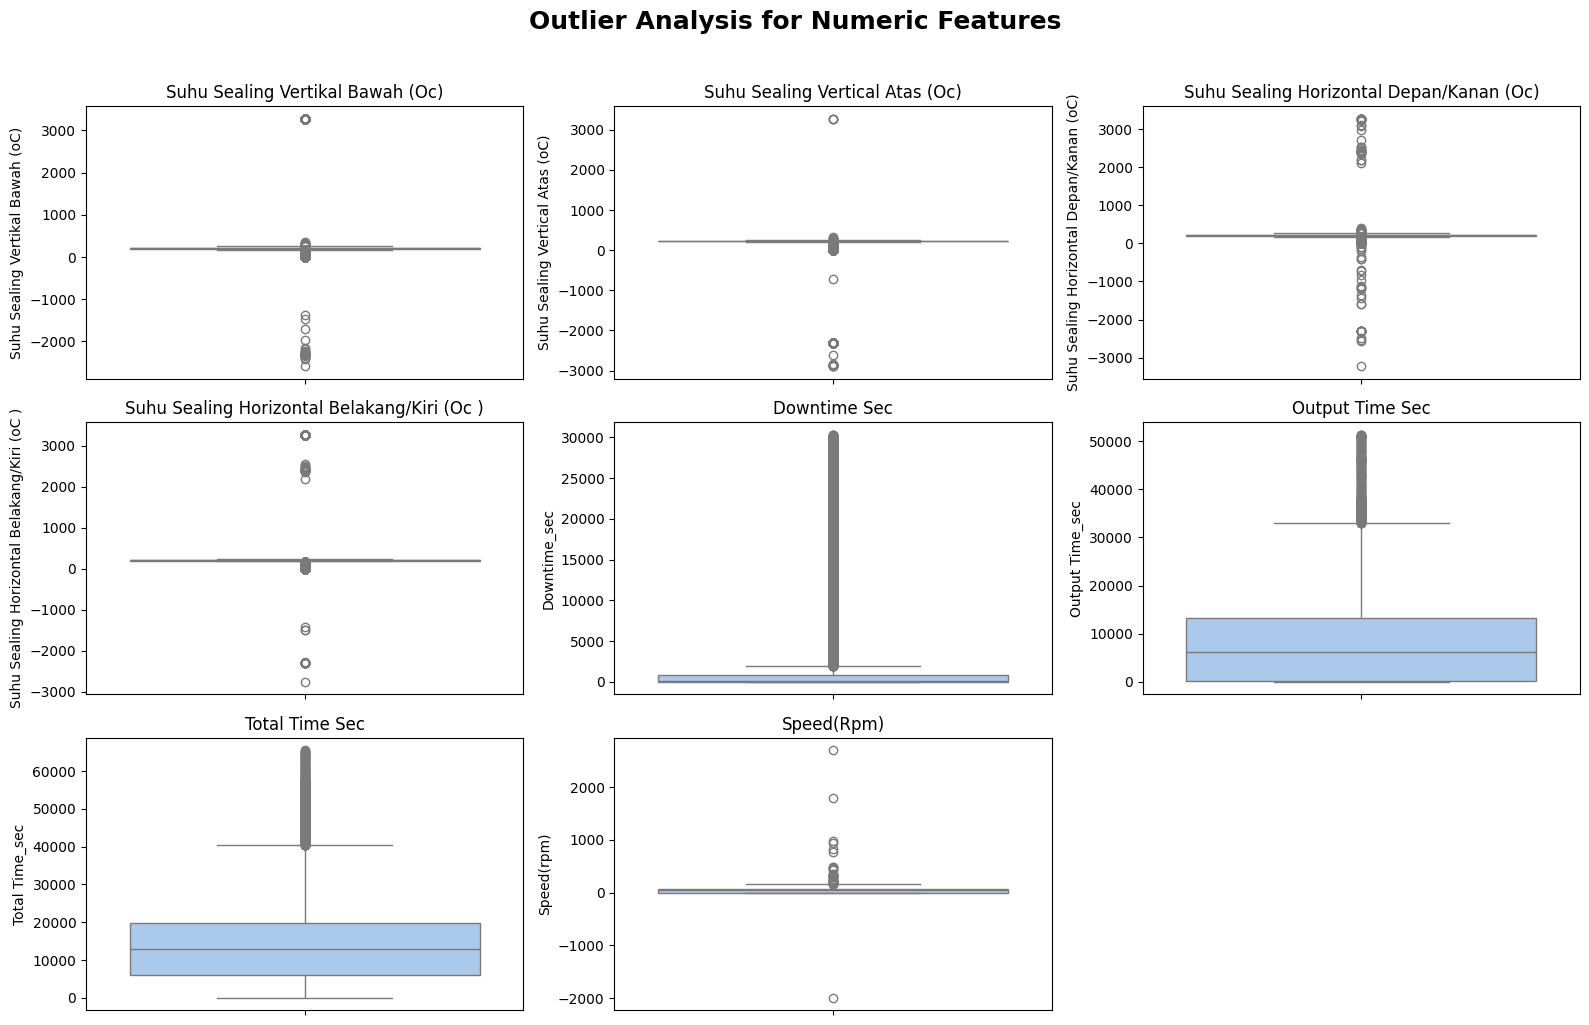

In [13]:
numeric_cols = [
    'Suhu Sealing Vertikal Bawah (oC)',
    'Suhu Sealing Vertical Atas (oC)',
    'Suhu Sealing Horizontal Depan/Kanan (oC)',
    'Suhu Sealing Horizontal Belakang/Kiri (oC )',
    'Downtime_sec', 'Output Time_sec',
    'Total Time_sec',
    'Speed(rpm)'
]

plt.figure(figsize=(16, 10))
plt.suptitle("Outlier Analysis for Numeric Features", fontsize=18, weight='bold', y=1.02)

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], color=sns.color_palette("pastel")[0])
    plt.title(col.replace('_', ' ').title(), fontsize=12)

plt.tight_layout()
plt.show()

In [18]:
df_cleaned = df.copy()
print(f"Shape before outlier removal: {df_cleaned.shape}")

for col in numeric_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

print(f"Shape after outlier removal: {df_cleaned.shape}")
print(f"Percentage of data removed: {1 - df_cleaned.shape[0] / df.shape[0]:.2%}")

Shape before outlier removal: (263326, 21)
Shape after outlier removal: (191698, 21)
Percentage of data removed: 27.20%


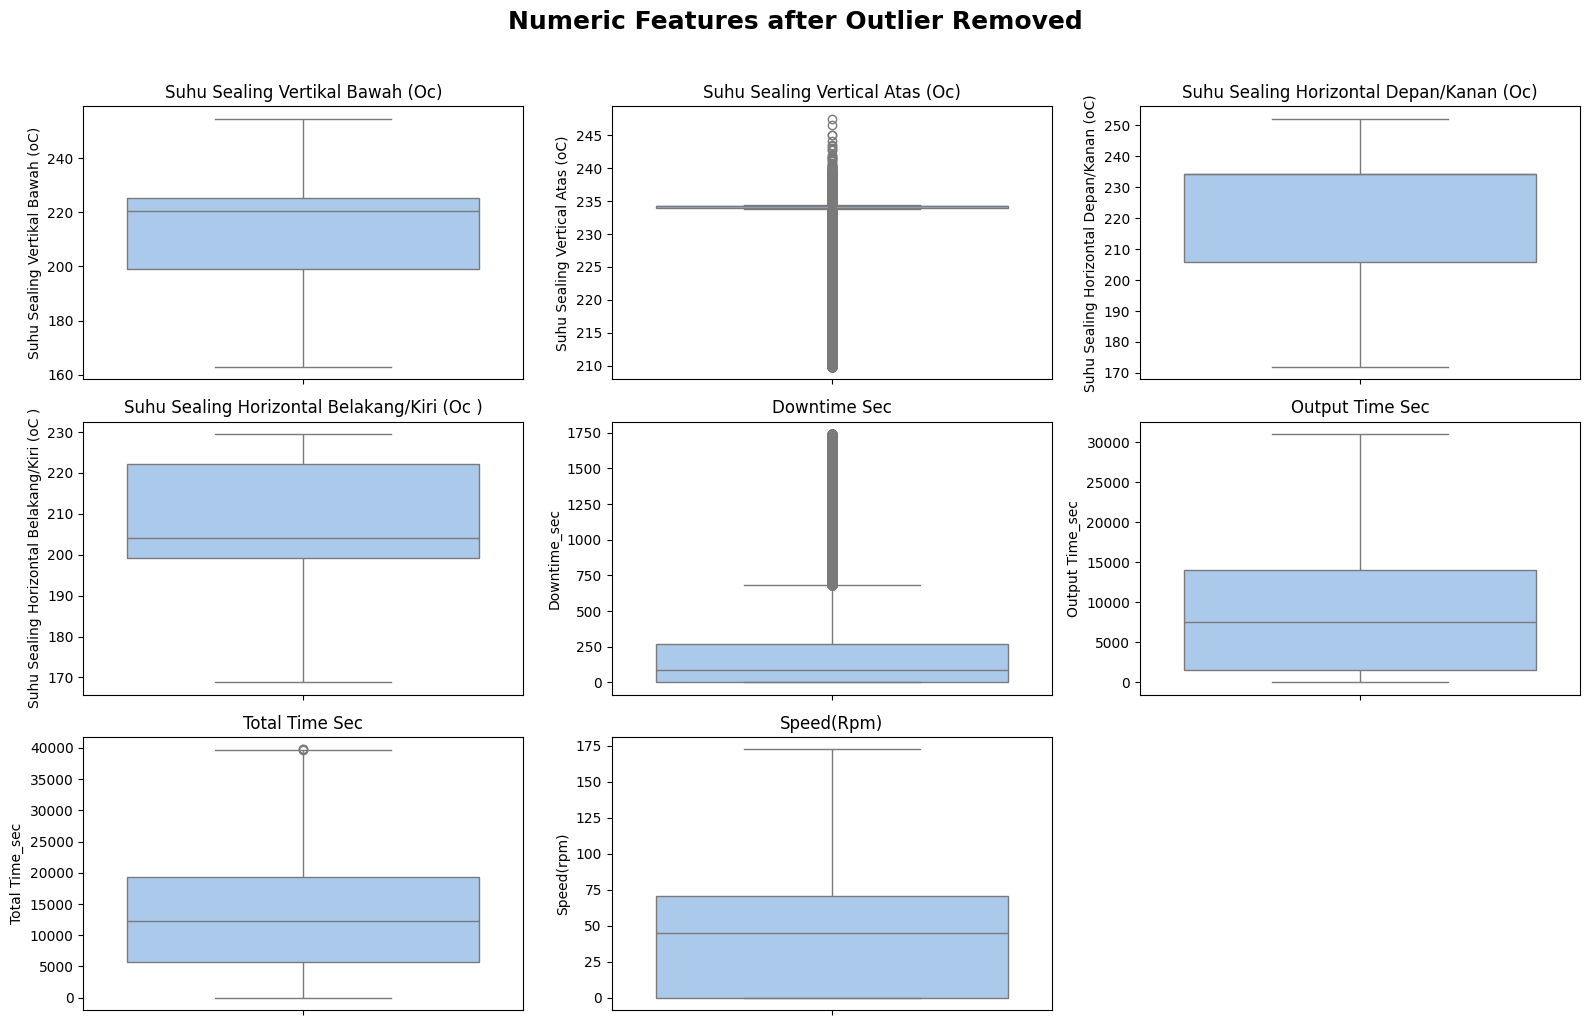

In [19]:
plt.figure(figsize=(16, 10))
plt.suptitle("Numeric Features after Outlier Removed", fontsize=18, weight='bold', y=1.02)

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df_cleaned[col], color=sns.color_palette("pastel")[0])
    plt.title(col.replace('_', ' ').title(), fontsize=12)

plt.tight_layout()
plt.show()

### Distribution of Binary Columns

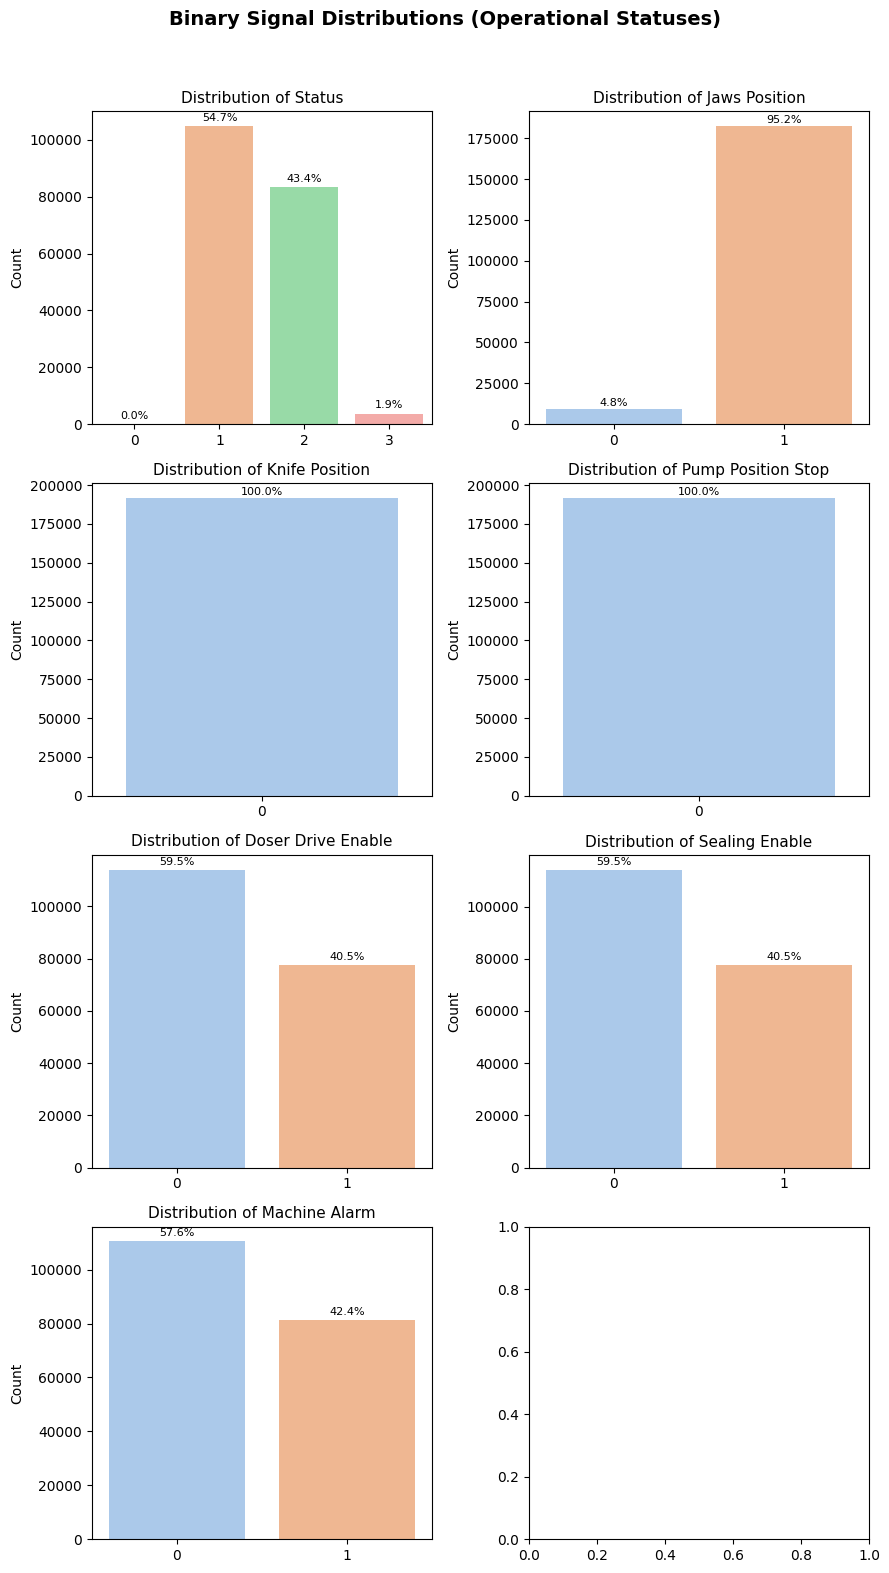

In [25]:
binary_cols = [
    'Status', 'Jaws Position',
    'Knife Position', 'Pump Position Stop', 'Doser Drive Enable',
    'Sealing Enable', 'Machine Alarm'
]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(9, 16))
axes = axes.flatten()

for i, col in enumerate(binary_cols):
    ax = axes[i]
    sns.countplot(data=df_cleaned, x=col, ax=ax, palette='pastel')

    total = len(df_cleaned)
    for p in ax.patches:
        count = p.get_height()
        percentage = f'{100 * count / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = count
        ax.text(x, y + total * 0.01, percentage, ha='center', fontsize=8)

    ax.set_title(f'Distribution of {col.replace("_", " ").title()}', fontsize=11)
    ax.set_xlabel('')
    ax.set_ylabel('Count')

plt.suptitle('Binary Signal Distributions (Operational Statuses)', fontsize=14, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [28]:
# Drop unnecessary columns because they are not needed for further analysis
df_cleaned.drop(columns=["Knife Position", "Pump Position Stop"], inplace=True)

### Correlation Matrix

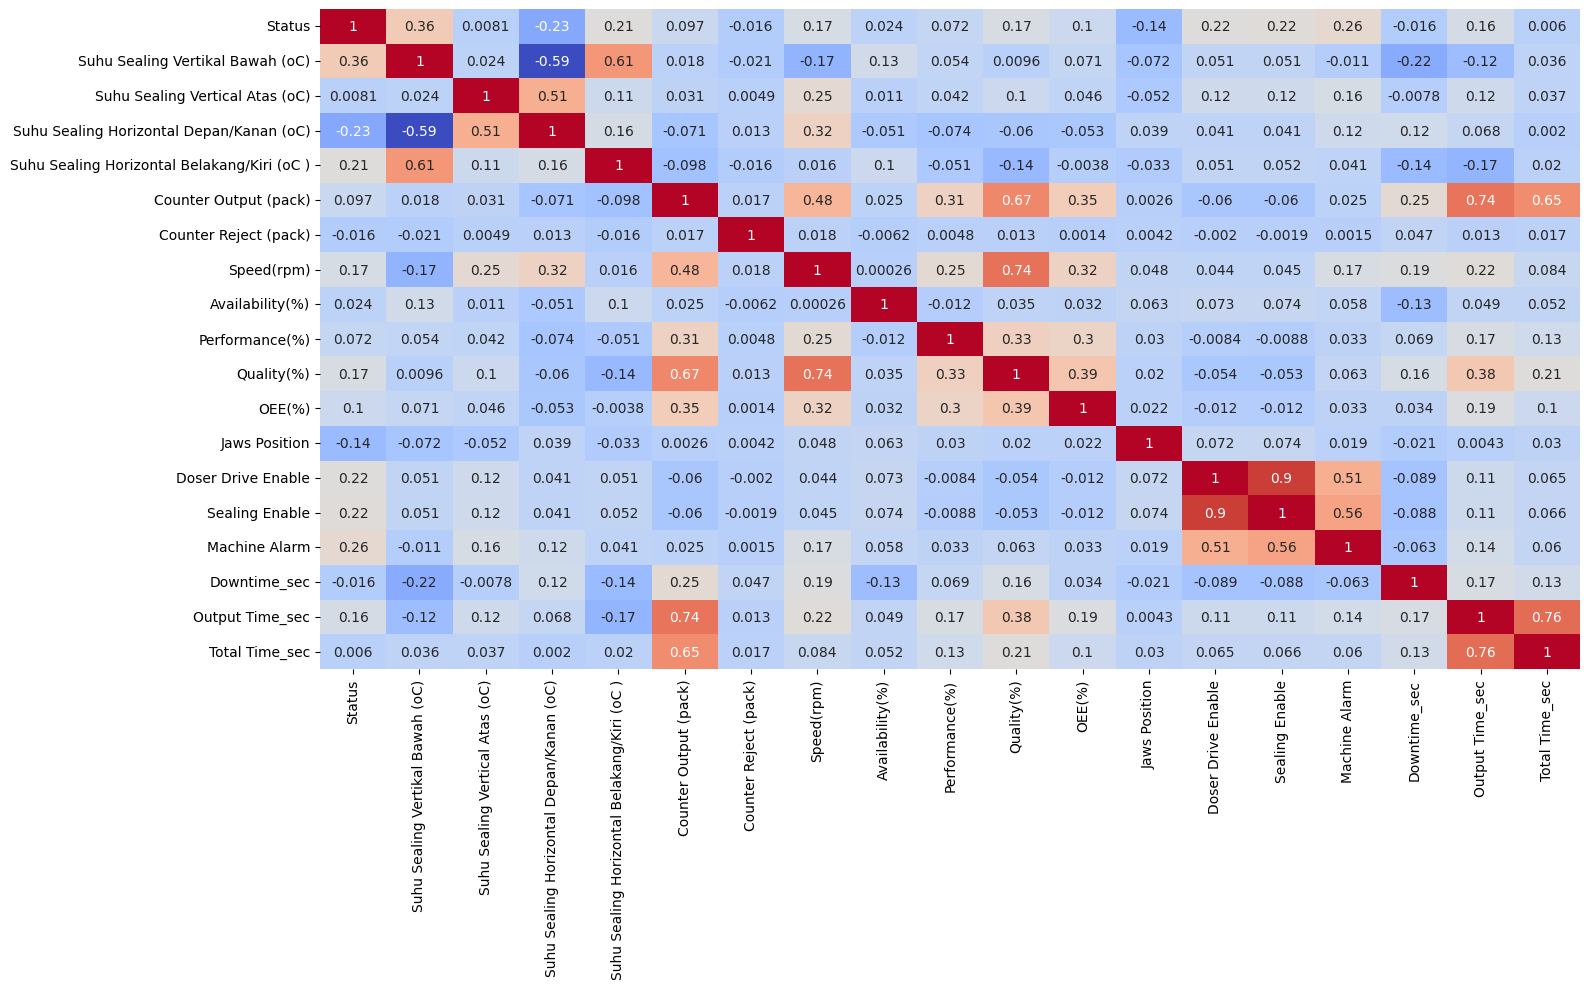

In [29]:
plt.figure(figsize=(16, 10))
sns.heatmap(df_cleaned.corr(), annot=True, cmap="coolwarm", cbar=False)
plt.tight_layout()

## I.b Trend Analysis of Sealing Temperature Columns During Abnormal Machine States

**Main Objective:**

Melihat bagaimana kolom-kolom suhu sealing (misalnya: suhu_sealing_vertikal_bawah, suhu_sealing_horizontal_belakang, dll.) berubah atau mengalami tren tertentu ketika mesin mengalami alarm atau kondisi abnormal.

**Why is Metter:**
1. Stabilitas suhu = kunci keberhasilan sealing:
    - proses sealing di mesin kemasan membutuhkan suhu yang konsisten dan optimal.
    - Fluktuasi suhu bisa menyebabkan hasil sealing tidak sempurna (misalnya bocor).

2. Memahami akar masalah anomali (root cause analysis):

    Dengan membandingkan tren suhu saat alarm aktif vs normal, kita bisa mencari tahu apakah ada hubungan suhu tidak stabil dengan munculnya alarm.

3. Membantu pemilihan fitur untuk model ML:

    Jika tren suhu terbukti berperan penting dalam munculnya anomali, maka kolom-kolom tersebut bisa menjadi fitur utama dalam model deteksi anomali (unsupervised) atau prediksi alarm.

4. Prediksi dini alarm:

    Jika ditemukan pola suhu tertentu yang selalu muncul beberapa saat sebelum alarm aktif, kita bisa memanfaatkannya untuk memprediksi alarm sebelum benar-benar terjadi (early warning system).


In [36]:
df.columns

Index(['Status', 'Suhu Sealing Vertikal Bawah (oC)',
       'Suhu Sealing Vertical Atas (oC)',
       'Suhu Sealing Horizontal Depan/Kanan (oC)',
       'Suhu Sealing Horizontal Belakang/Kiri (oC )', 'Counter Output (pack)',
       'Counter Reject (pack)', 'Speed(rpm)', 'Availability(%)',
       'Performance(%)', 'Quality(%)', 'OEE(%)', 'Jaws Position',
       'Doser Drive Enable', 'Sealing Enable', 'Machine Alarm', 'Downtime_sec',
       'Output Time_sec', 'Total Time_sec'],
      dtype='object')

In [46]:
# Function helper
def get_abnormal_segments(mask):
    segments = []
    start = None
    for i, val in enumerate(mask):
        if val and start is None:
            start = i
        elif not val and start is not None:
            segments.append((start, i - 1))
            start = None
    if start is not None:
        segments.append((start, len(mask) - 1))
    return segments

def plot_temperature(df: pd.DataFrame, period: str = "all_time", with_segments: bool = False):
    temp_cols = [
        'Suhu Sealing Vertikal Bawah (oC)',
        'Suhu Sealing Vertical Atas (oC)',
        'Suhu Sealing Horizontal Depan/Kanan (oC)',
        'Suhu Sealing Horizontal Belakang/Kiri (oC )'
    ]

    if not isinstance(df.index, pd.DatetimeIndex):
        raise ValueError("Index of dataframe must be a DatatimeIndex")

    now = df.index.max()
    if period == "last_day":
        df_period = df[df.index >= now - pd.Timedelta(hours=24)]
    elif period == "last_week":
        df_period = df[df.index >= now - pd.Timedelta(days=7)]
    elif period == "last_month":
        df_period = df[df.index >= now - pd.Timedelta(days=30)]
    elif period == "last_year":
        df_period = df[df.index >= now - pd.Timedelta(days=365)]
    else:
        df_period = df

    _, axes = plt.subplots(len(temp_cols), 1, figsize=(18, 10), sharex=True)
    for i, col in enumerate(temp_cols):
        sns.lineplot(data=df_period, x=df_period.index, y=col, ax=axes[i], palette="pastel")
        axes[i].set_title(f"{col.replace('_', ' ').title()}", fontsize=12, loc="left")
        axes[i].set_ylabel("Temp (°C)")
        axes[i].set_ylim(100, 300) 
        axes[i].grid(True)

        if with_segments:
            abnormal_mask = (
                (df_period["Status"] != 2) &
                (df_period["Output Time_sec"] == 0)
            )
            segments = get_abnormal_segments(abnormal_mask.values)
            for start, end in segments:
                axes[i].axvspan(df_period.index[start], df_period.index[end], color='red', alpha=0.3)

    axes[-1].set_xlabel("Timestamp")
    highlight_text = "with Machine Alarm Highlighted" if with_segments else ""
    plt.suptitle(f"Sealing Temperature Trends {highlight_text} ({period.replace('_', ' ').title()})",
                 fontsize=16, weight="bold")
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

### All Time

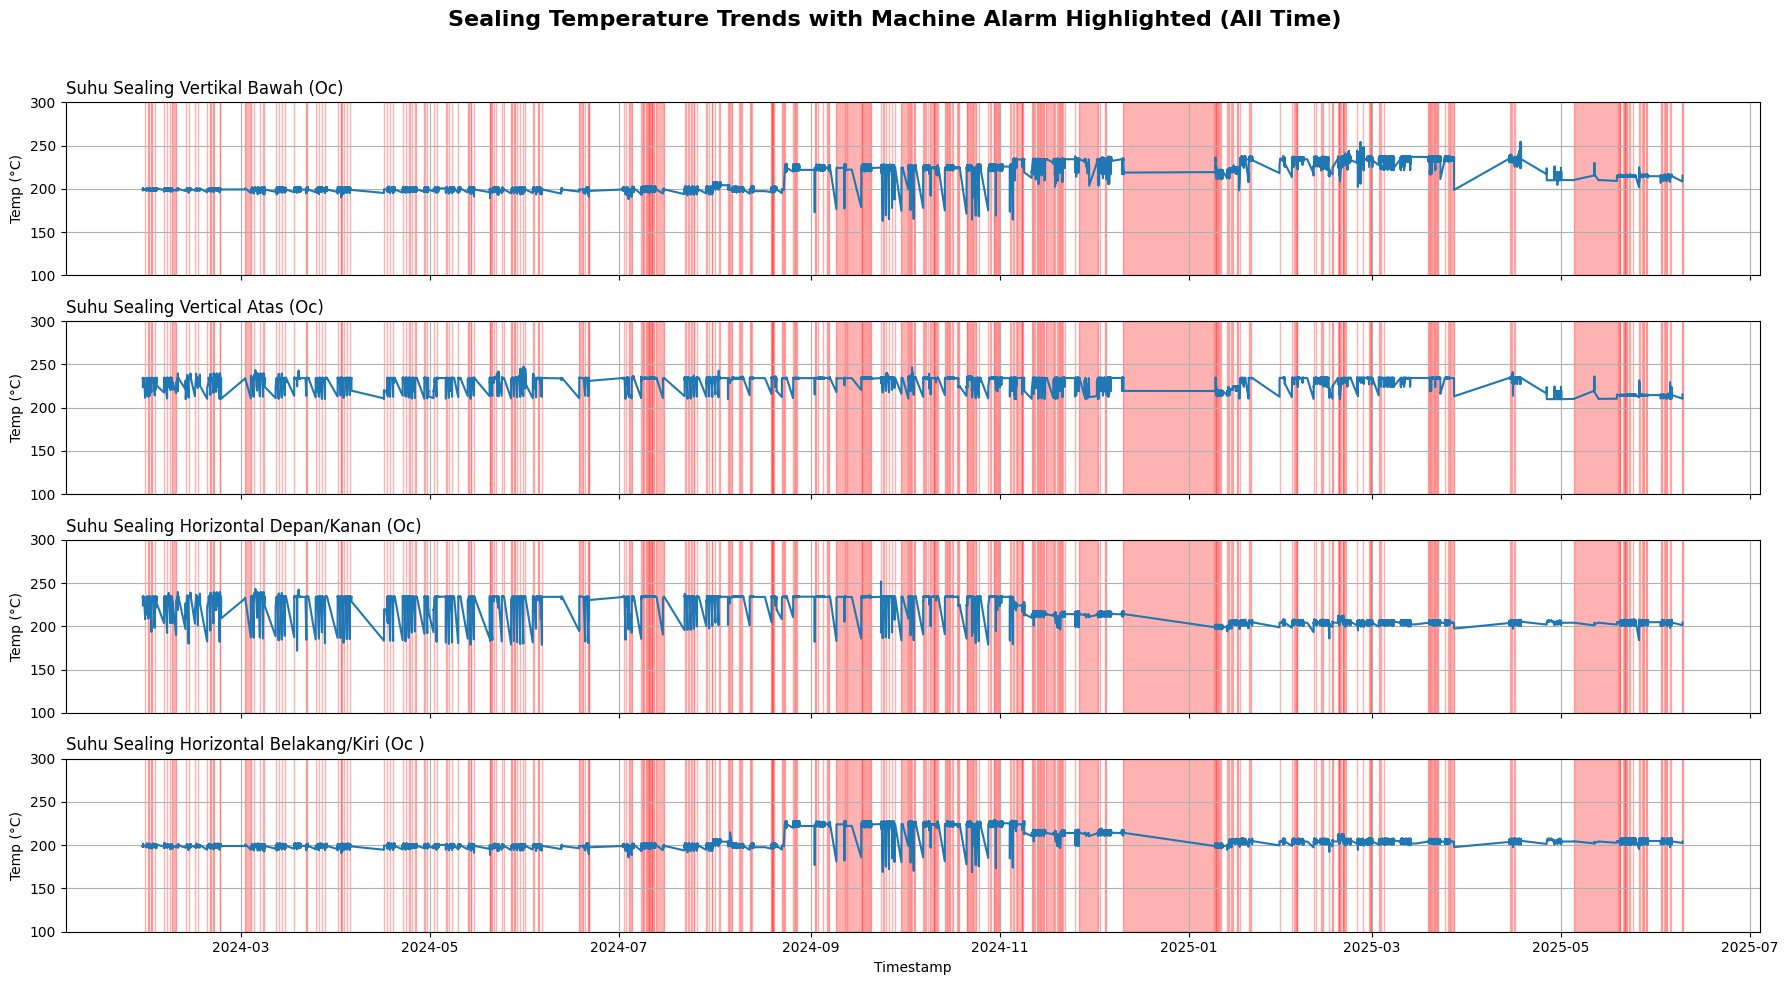

In [39]:
plot_temperature(df_cleaned, with_segments=True)

### Last Month

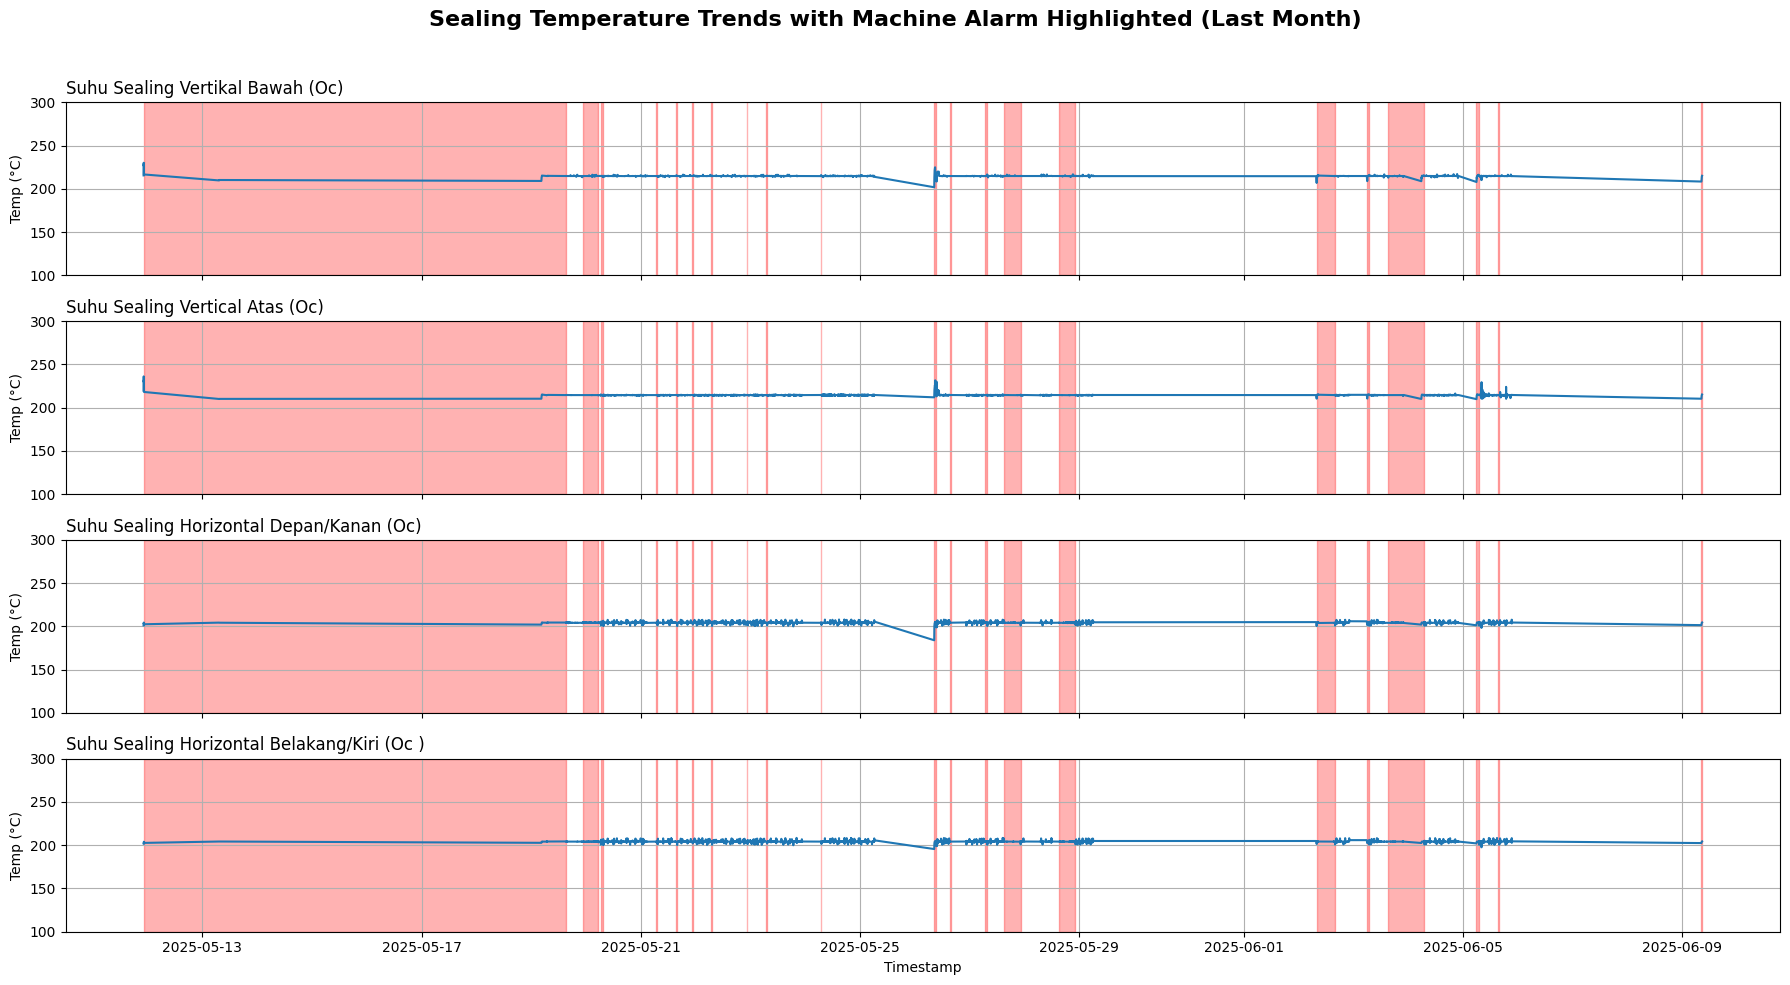

In [40]:
plot_temperature(df_cleaned, period="last_month", with_segments=True)

### Last Week

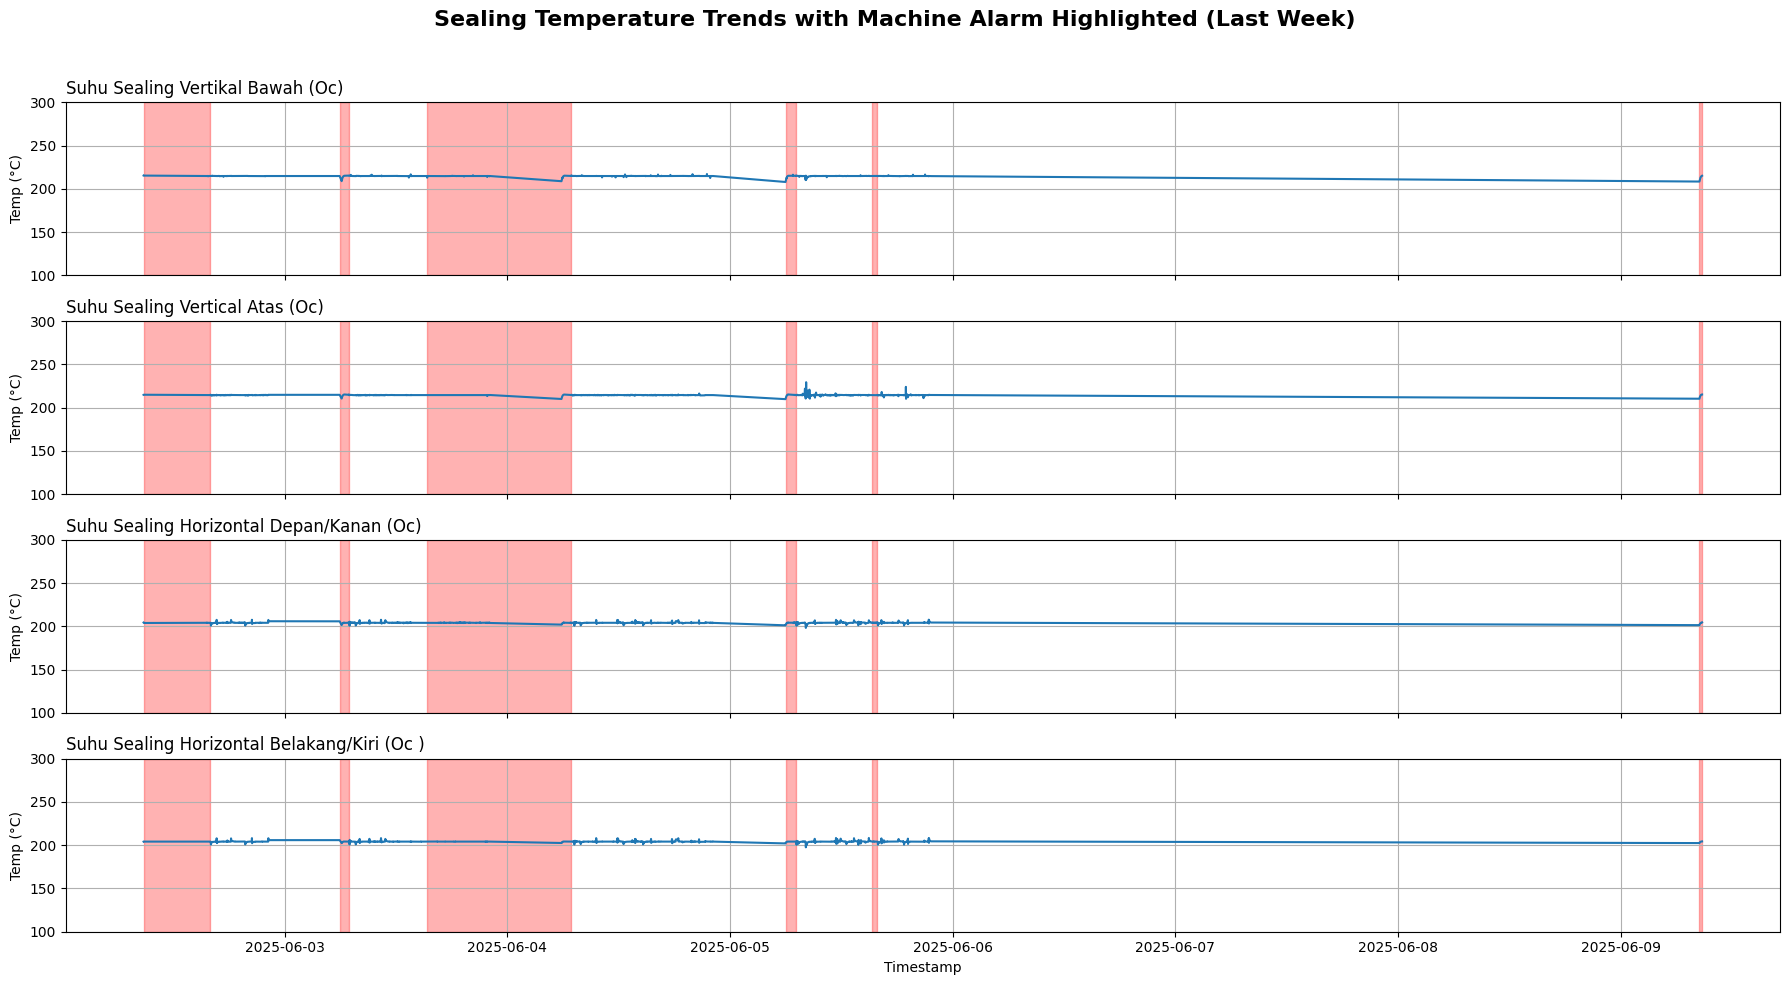

In [41]:
plot_temperature(df_cleaned, period="last_week", with_segments=True)

### Last Day

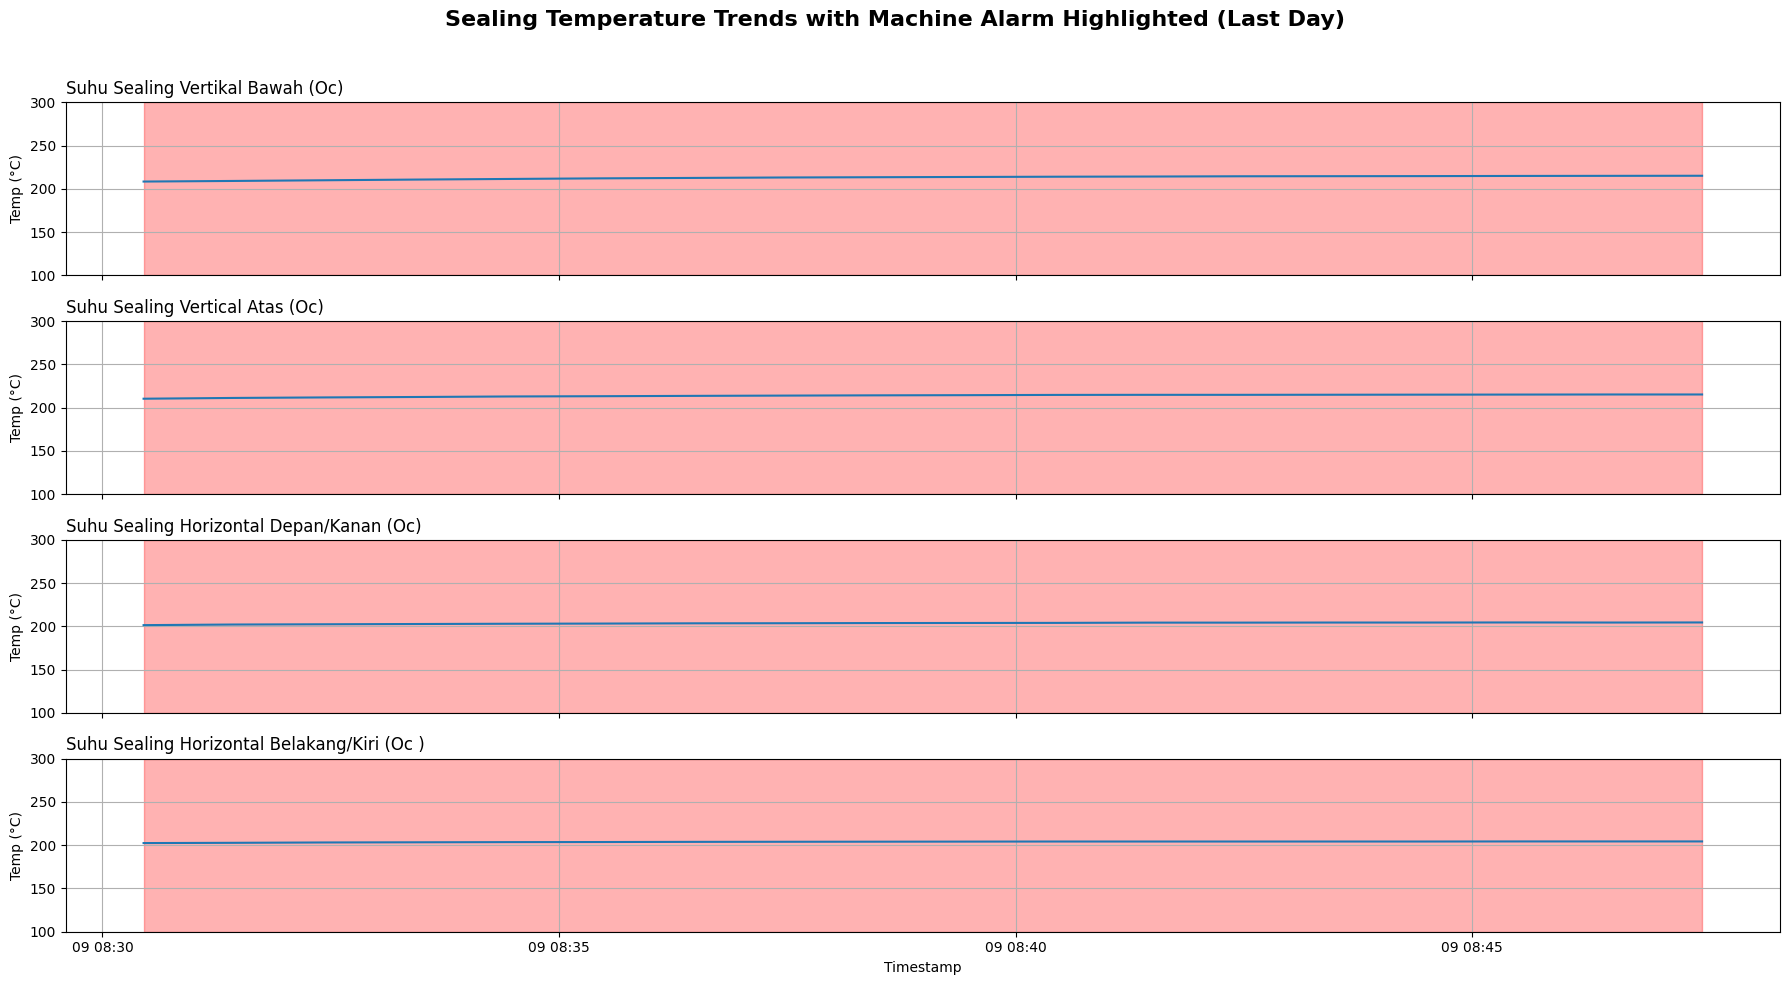

In [47]:
plot_temperature(df_cleaned, period="last_day", with_segments=True)

# II. Features Selection


**Tujuan:**

Menyiapkan data yang merepresentasikan kondisi normal mesin (tanpa alarm) sebagai dasar (baseline) untuk analisis lebih lanjut, seperti deteksi anomali atau pemodelan prediktif.

**Proses:**

Penyaringan Data Normal:
Dataset disaring untuk hanya menyertakan baris-baris data saat:

`machine_alarm == 0` → mesin tidak mengalami gangguan atau kondisi abnormal.

**Visualisasi:**

Sinyal suhu dari data normal divisualisasikan untuk periode satu hari terakhir, guna memastikan kestabilan dan konsistensi suhu selama kondisi mesin normal.

**Penghapusan Fitur yang Tidak Informatif:**

Fitur-fitur berikut dihapus karena selalu bernilai 0 dan tidak memberikan kontribusi informasi dalam analisis:

- jaws_position
- knife_position
- pump_position_stop

**Hasil Akhir:**

Dataset hasil seleksi disimpan sebagai datalog_ilapak10_normal.csv. Dataset ini akan digunakan sebagai acuan kondisi normal untuk membandingkan perilaku sistem saat terjadi anomali atau alarm.

In [ ]:
df.head(1)

In [ ]:
# data_normal = df_cleaned[(df_cleaned["machine_alarm"] == 0) & (df_cleaned["sealing_enable"] == 1) & (df_cleaned["doser_drive_enable"] == 1)]
# plot_temperature(data_normal, period="last_day")

# features_selected = [
#     "suhu_sealing_vertikal_bawah", "suhu_sealing_vertikal_atas",
#     "suhu_sealing_horizontal_depan", "suhu_sealing_horizontal_belakang",
#     "output_time_sec",
# ]

# # Drop that features because they are not useful (just 0)
# df_final = data_normal[features_selected]
# df_final.head()

In [ ]:
# df_final.describe()